# Exemplo DS

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Imports

In [1]:
import string
letters = list(string.ascii_lowercase)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Ler dados

In [2]:
df = pd.read_csv("../data/heart_processed.csv")
df.shape

(918, 12)

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Masculino,Atypical Angina,140,289,0,Normal,172,N,0.0,Up,0
1,49,Feminino,Non-Anginal Pain,160,180,0,Normal,156,N,1.0,Flat,1
2,37,Masculino,Atypical Angina,130,283,0,having ST-T wave abnormality,98,N,0.0,Up,0
3,48,Feminino,Asymptomatic,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,Masculino,Non-Anginal Pain,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
TARGET = "HeartDisease"

In [5]:
df["RestingECG"].unique()

array(['Normal', 'having ST-T wave abnormality',
       'showing probable or definite left ventricular hypertrophy by Estes criteria'],
      dtype=object)

In [6]:
df.loc[df["RestingECG"] == "having ST-T wave abnormality", "RestingECG"] = "having ST-T"
df.loc[df["RestingECG"] == "showing probable or definite left ventricular hypertrophy by Estes criteria", "RestingECG"] = "ventricular hypertrophy"

## Corrige tipo

In [7]:
df["FastingBS"] = df["FastingBS"].astype(str)

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS          object
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Categorização

In [9]:
def create_labels(bins):

    labels = []
    
    for i in range(len(bins)-1):
        label = f"{letters[i]}_({round(bins[i], 2)}_{round(bins[i+1], 2)}]"
        labels.append(label)
    
    return labels

def categorize_column(data, column, q=5):

    if column == "Oldpeak":
        q=4
    
    _, bins = pd.qcut(data[column], q=q, retbins=True)
    bins[0] = -np.inf
    bins[-1] = np.inf

    labels = create_labels(bins)

    data[f"{column}_cat"] = pd.cut(data[column], bins=bins, labels=labels)
    # data[f"{column}_cat"] = data[f"{column}_cat"].astype(str)

    return data

In [10]:
numeric_cols = list(df.select_dtypes(include='number').columns)
numeric_cols.remove(TARGET)

In [11]:
for col in numeric_cols:
    categorize_column(df, col)

In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_cat,RestingBP_cat,Cholesterol_cat,MaxHR_cat,Oldpeak_cat
0,40,Masculino,Atypical Angina,140,289,0,Normal,172,N,0.0,Up,0,a_(-inf_45.0],d_(135.2_145.0],e_(276.0_inf],e_(160.0_inf],a_(-inf_0.0]
1,49,Feminino,Non-Anginal Pain,160,180,0,Normal,156,N,1.0,Flat,1,b_(45.0_52.0],e_(145.0_inf],b_(134.8_209.0],d_(144.0_160.0],c_(0.6_1.5]
2,37,Masculino,Atypical Angina,130,283,0,having ST-T,98,N,0.0,Up,0,a_(-inf_45.0],c_(128.0_135.2],e_(276.0_inf],a_(-inf_115.0],a_(-inf_0.0]
3,48,Feminino,Asymptomatic,138,214,0,Normal,108,Y,1.5,Flat,1,b_(45.0_52.0],d_(135.2_145.0],c_(209.0_238.2],a_(-inf_115.0],c_(0.6_1.5]
4,54,Masculino,Non-Anginal Pain,150,195,0,Normal,122,N,0.0,Up,0,c_(52.0_57.0],e_(145.0_inf],b_(134.8_209.0],b_(115.0_130.0],a_(-inf_0.0]


In [13]:
df.dtypes

Age                   int64
Sex                  object
ChestPainType        object
RestingBP             int64
Cholesterol           int64
FastingBS            object
RestingECG           object
MaxHR                 int64
ExerciseAngina       object
Oldpeak             float64
ST_Slope             object
HeartDisease          int64
Age_cat            category
RestingBP_cat      category
Cholesterol_cat    category
MaxHR_cat          category
Oldpeak_cat        category
dtype: object

## Univariada

In [14]:
def plot_volume(data, column):
    plt.clf()
    
    data[column].hist()

    plt.title(column)
    
    plt.show()

### Volume

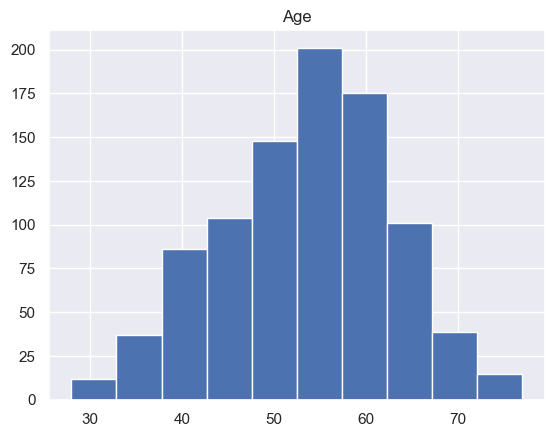

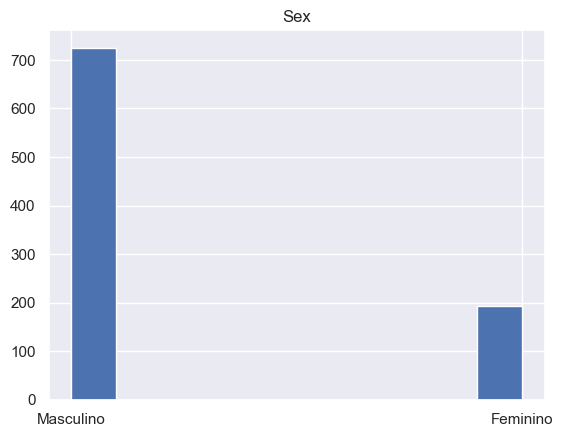

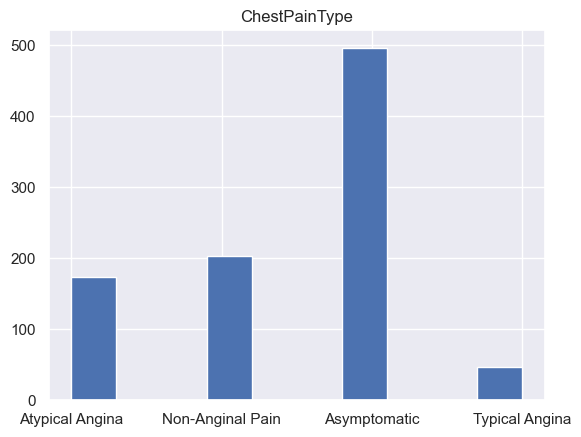

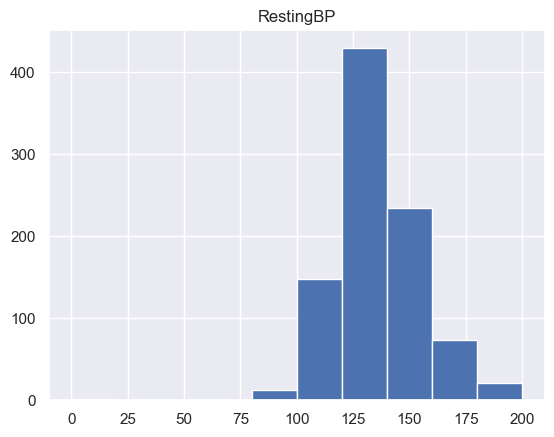

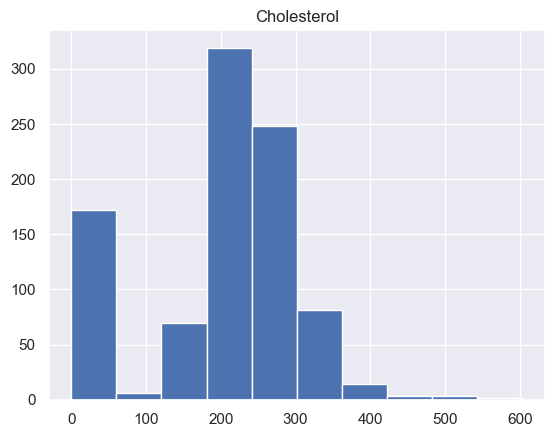

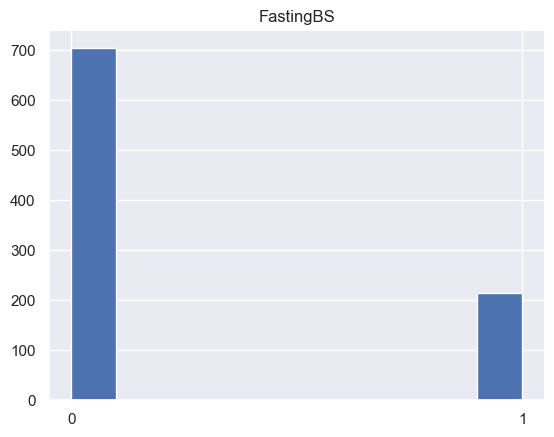

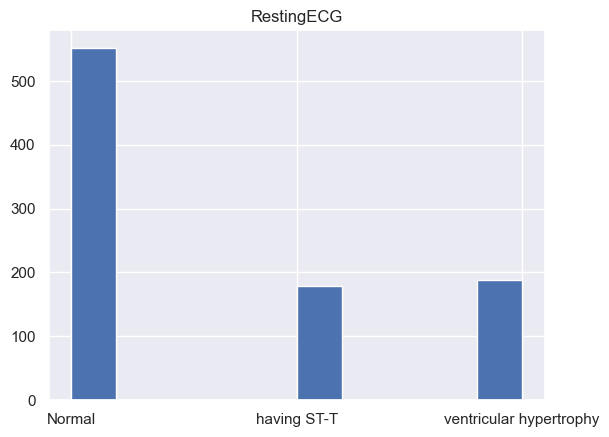

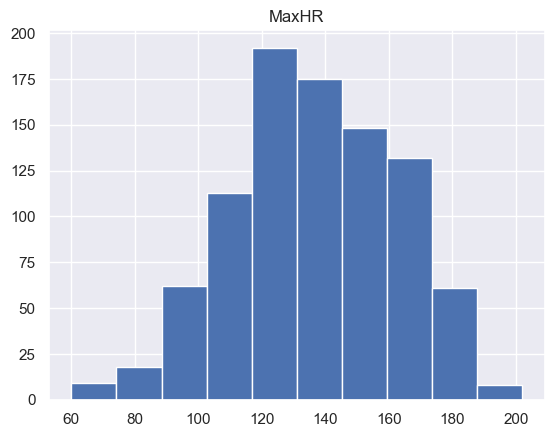

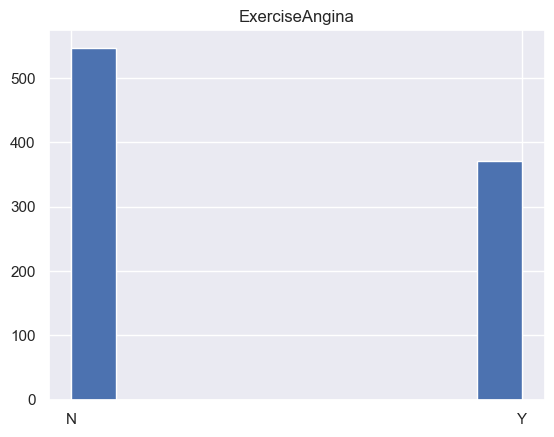

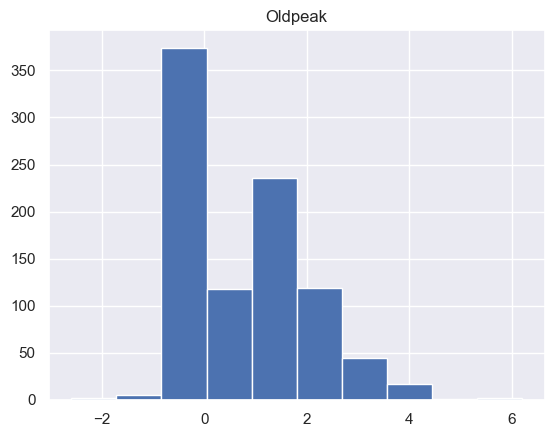

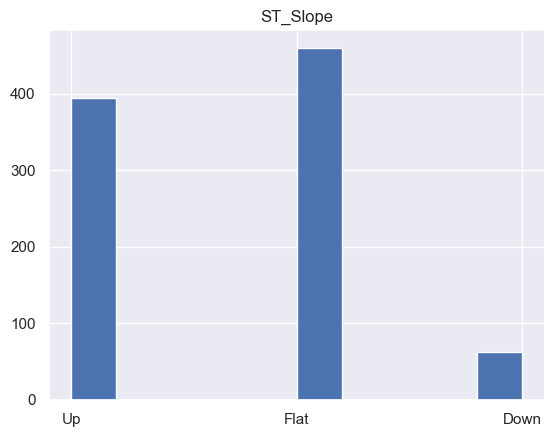

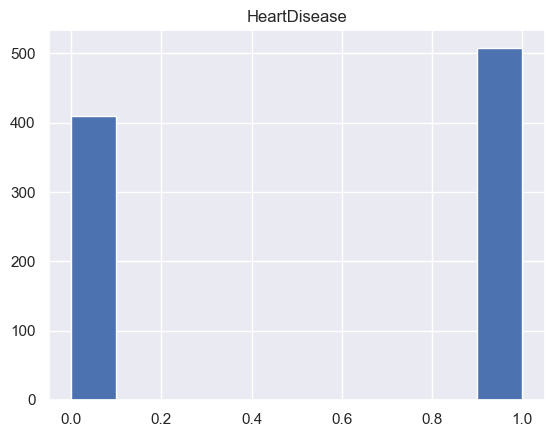

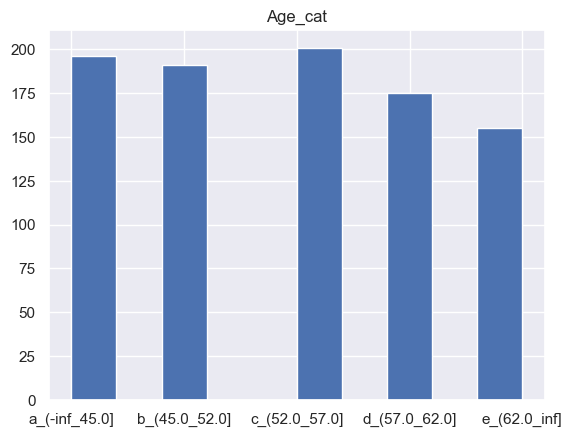

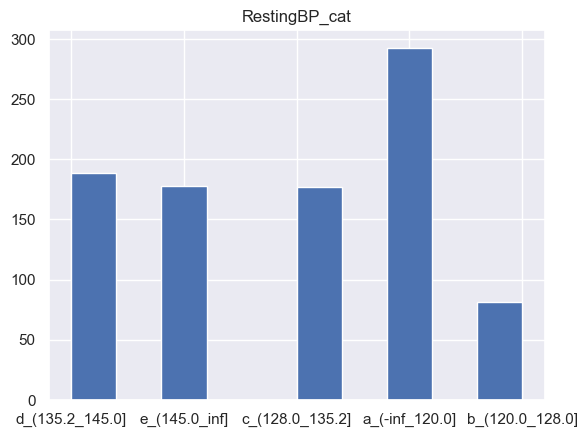

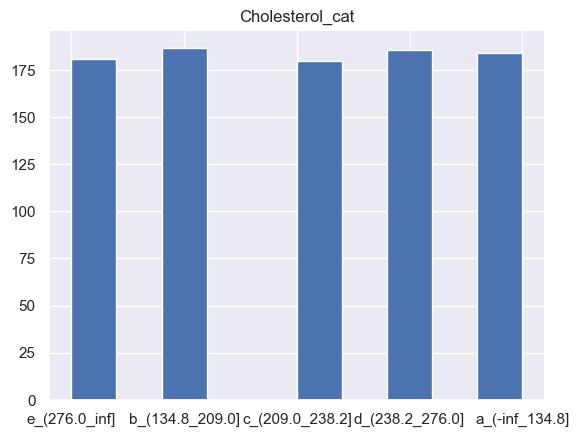

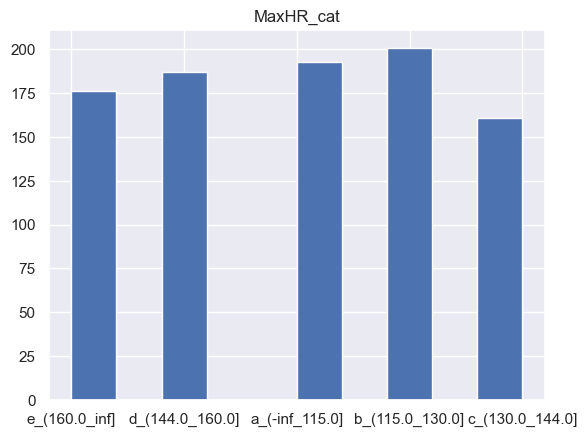

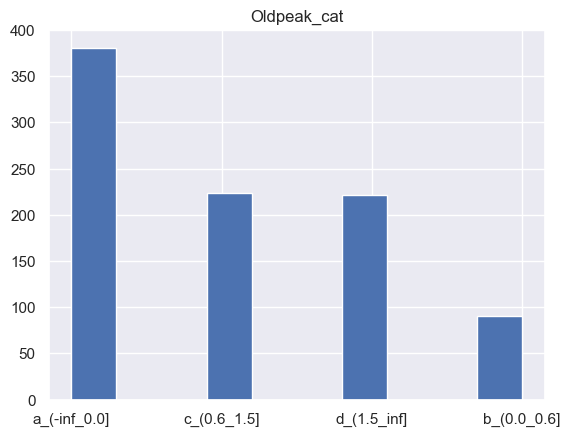

In [15]:
for col in df.columns:
    plot_volume(df, col)

### Colunas numéricas

In [16]:
numeric_cols = df.select_dtypes(include='number').columns

In [17]:
numeric_cols

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease'], dtype='object')

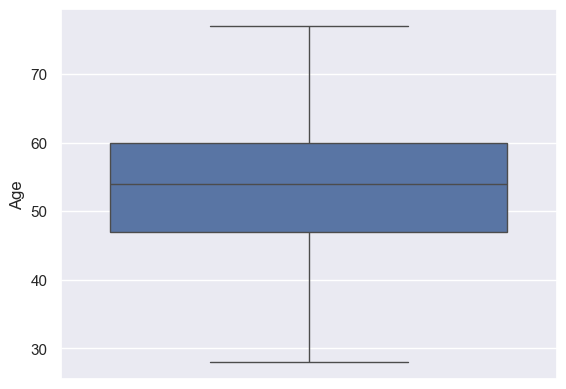

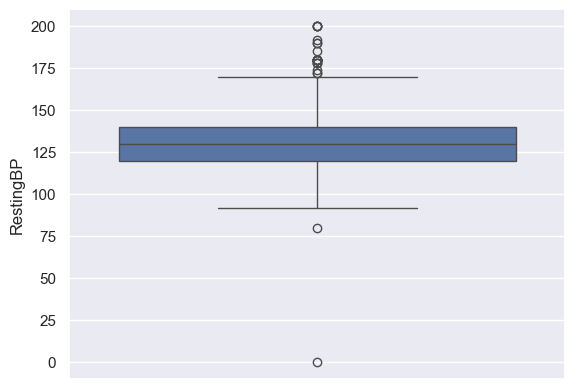

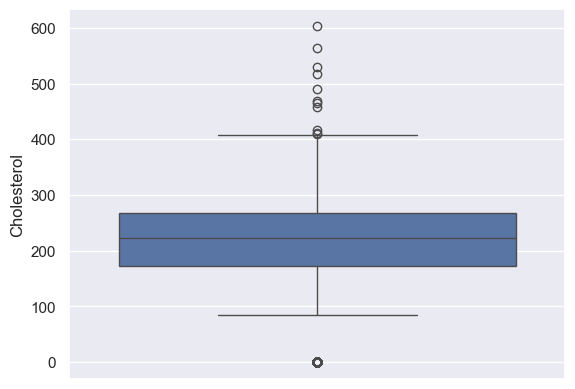

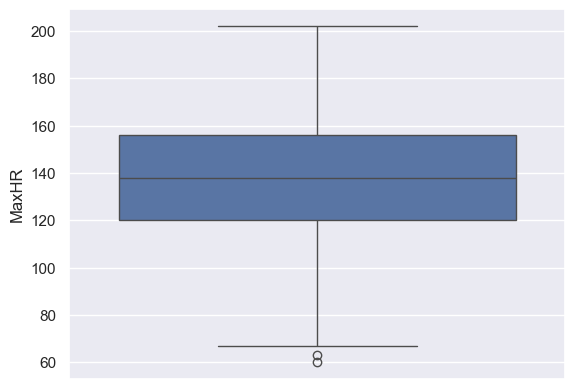

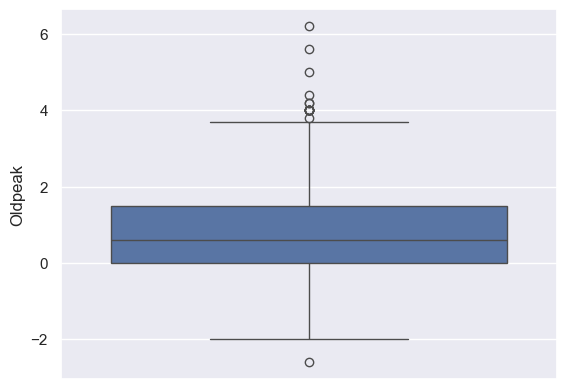

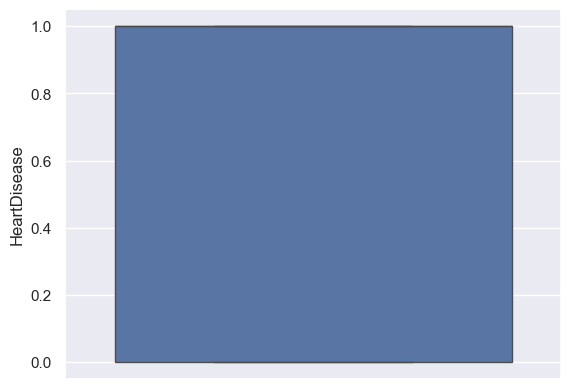

In [18]:
for col in numeric_cols:
    plt.clf()
    sns.boxplot(df[col])
    plt.show()

### Colunas categóricas

In [19]:
categoric_cols = list(df.select_dtypes(exclude='number').columns)

for col in [x for x in df.columns if "_cat" in x]:
    categoric_cols.remove(col)

In [20]:
categoric_cols

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

## Bivariada

### Correlação

<Axes: >

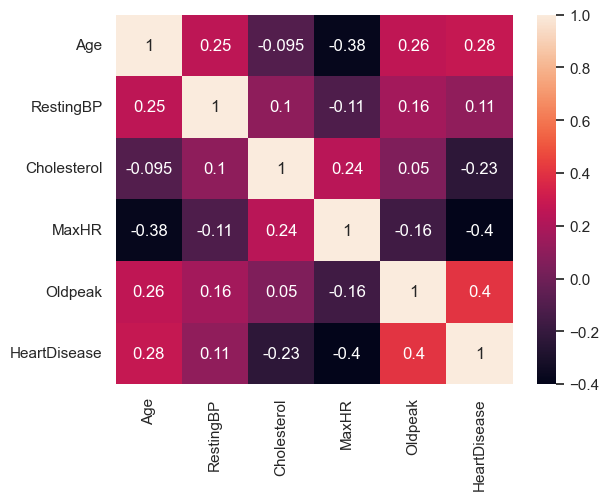

In [ ]:
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True)

### Colunas numéricas

In [22]:
cols_ncat = [x for x in df.columns if "_cat" in x]

In [23]:
cols_ncat

['Age_cat', 'RestingBP_cat', 'Cholesterol_cat', 'MaxHR_cat', 'Oldpeak_cat']

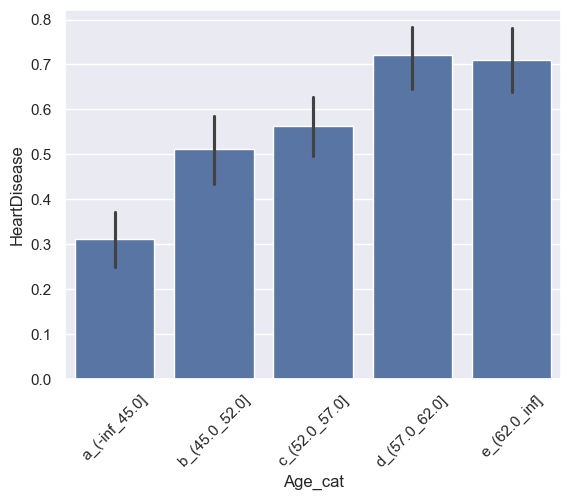

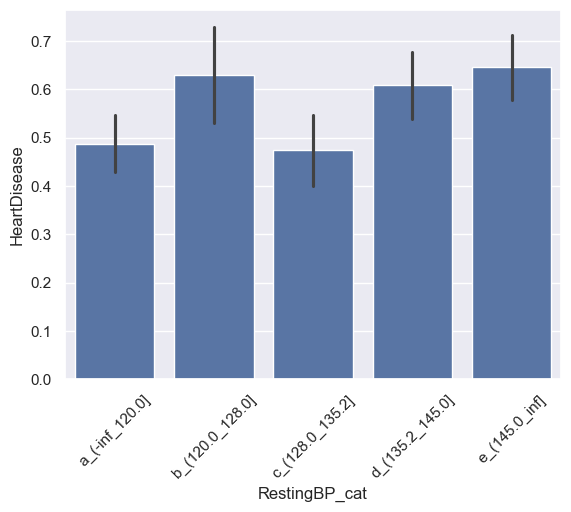

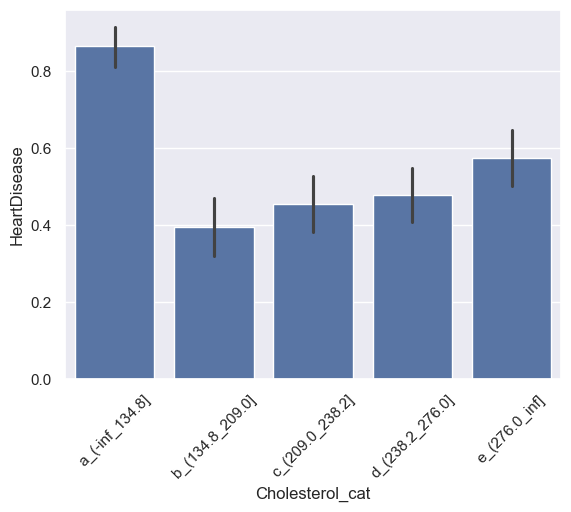

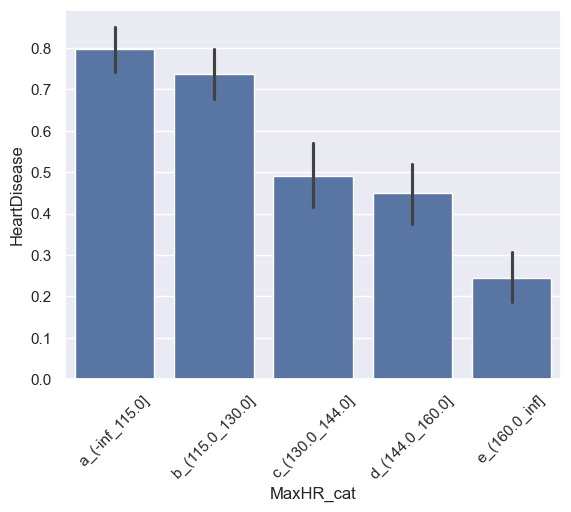

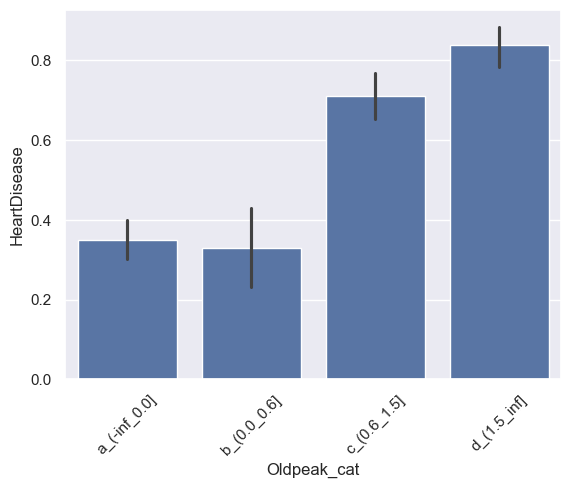

In [24]:
for col in cols_ncat:
    plt.clf()
    sns.barplot(df, x=col, y=TARGET)
    plt.xticks(rotation=45)
    plt.show()

### Colunas categóricas

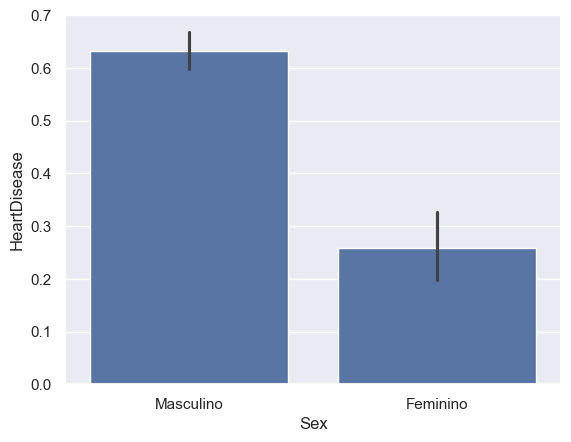

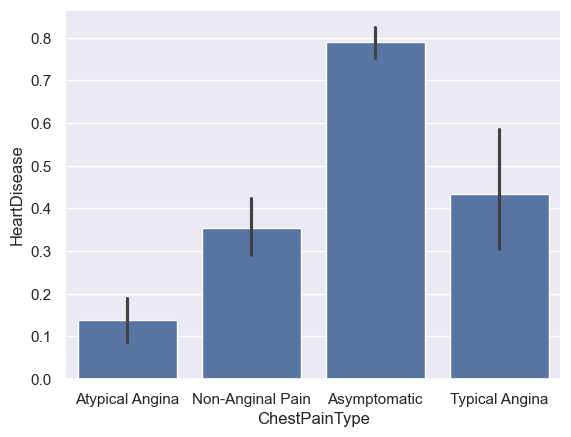

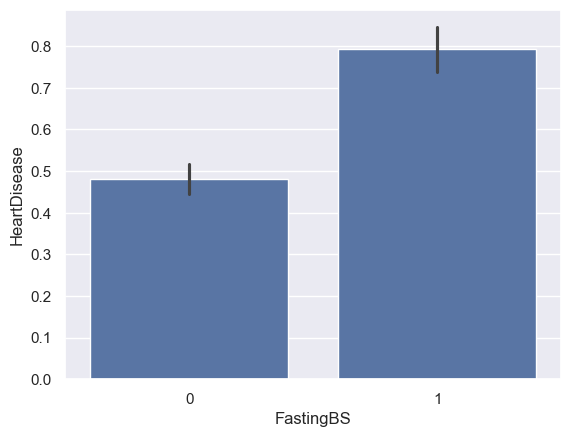

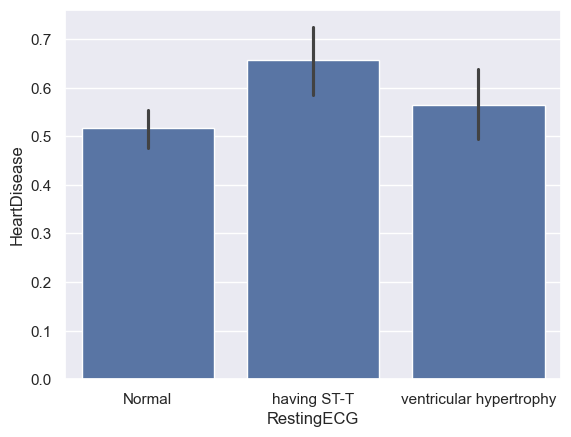

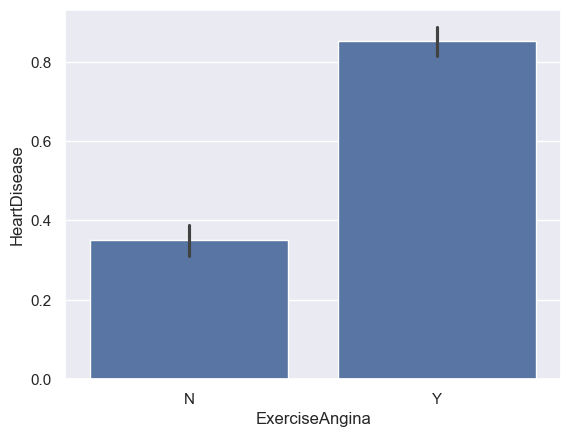

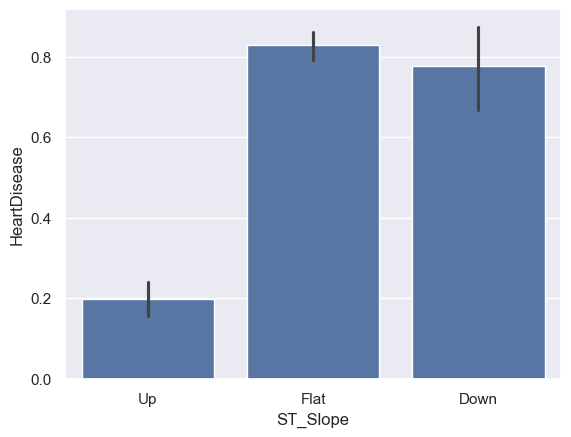

In [25]:
for col in categoric_cols:
    plt.clf()
    sns.barplot(data=df, x=col, y=TARGET)
    plt.show()

## Multivariada

In [26]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_cat,RestingBP_cat,Cholesterol_cat,MaxHR_cat,Oldpeak_cat
0,40,Masculino,Atypical Angina,140,289,0,Normal,172,N,0.0,Up,0,a_(-inf_45.0],d_(135.2_145.0],e_(276.0_inf],e_(160.0_inf],a_(-inf_0.0]
1,49,Feminino,Non-Anginal Pain,160,180,0,Normal,156,N,1.0,Flat,1,b_(45.0_52.0],e_(145.0_inf],b_(134.8_209.0],d_(144.0_160.0],c_(0.6_1.5]
2,37,Masculino,Atypical Angina,130,283,0,having ST-T,98,N,0.0,Up,0,a_(-inf_45.0],c_(128.0_135.2],e_(276.0_inf],a_(-inf_115.0],a_(-inf_0.0]
3,48,Feminino,Asymptomatic,138,214,0,Normal,108,Y,1.5,Flat,1,b_(45.0_52.0],d_(135.2_145.0],c_(209.0_238.2],a_(-inf_115.0],c_(0.6_1.5]
4,54,Masculino,Non-Anginal Pain,150,195,0,Normal,122,N,0.0,Up,0,c_(52.0_57.0],e_(145.0_inf],b_(134.8_209.0],b_(115.0_130.0],a_(-inf_0.0]


In [27]:
df.dtypes

Age                   int64
Sex                  object
ChestPainType        object
RestingBP             int64
Cholesterol           int64
FastingBS            object
RestingECG           object
MaxHR                 int64
ExerciseAngina       object
Oldpeak             float64
ST_Slope             object
HeartDisease          int64
Age_cat            category
RestingBP_cat      category
Cholesterol_cat    category
MaxHR_cat          category
Oldpeak_cat        category
dtype: object

<Axes: xlabel='Age', ylabel='HeartDisease'>

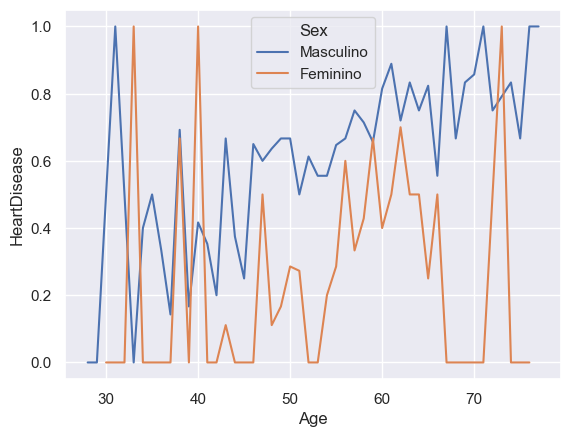

In [28]:
sns.lineplot(df, x="Age", y=TARGET, hue="Sex", errorbar=None)

<Axes: xlabel='Age', ylabel='HeartDisease'>

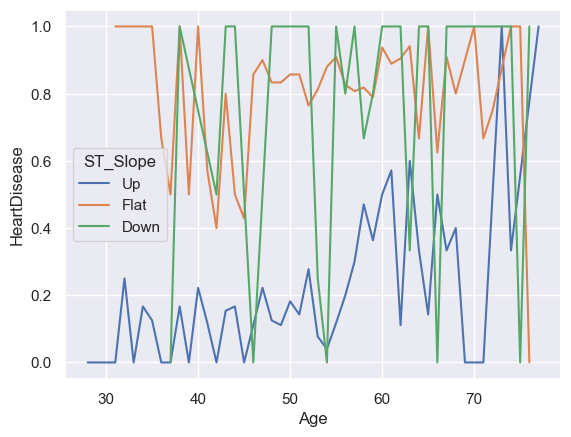

In [29]:
sns.lineplot(df, x="Age", y=TARGET, hue="ST_Slope", errorbar=None)